In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:


print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [ ]:

print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


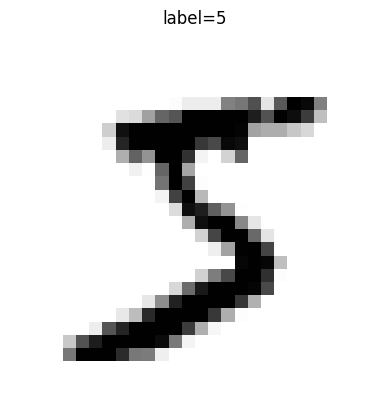

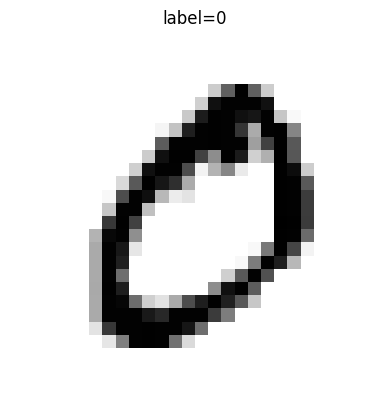

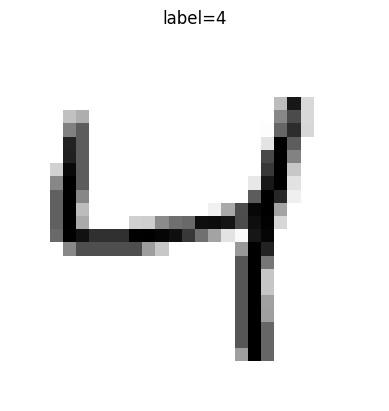

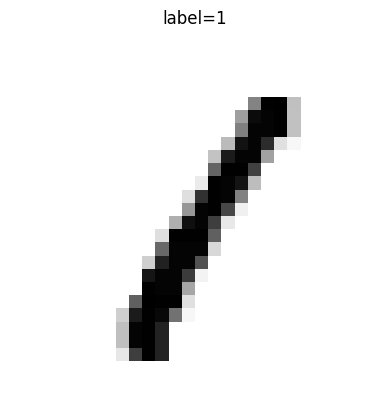

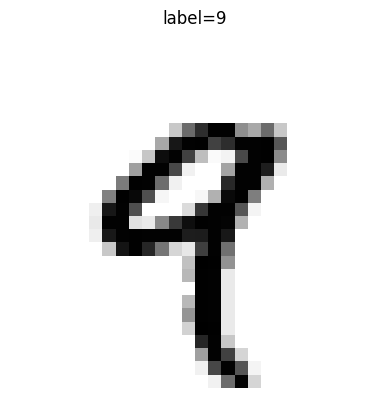

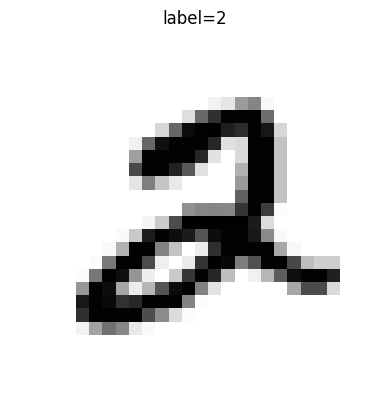

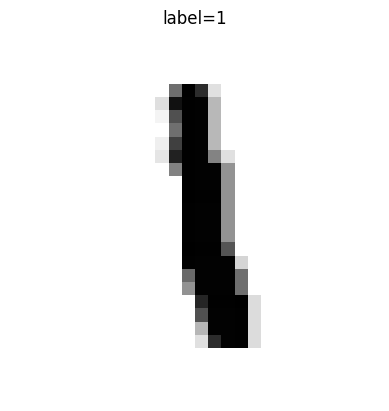

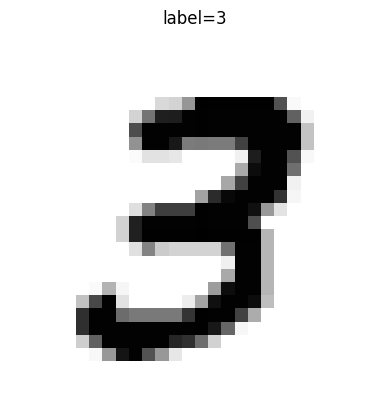

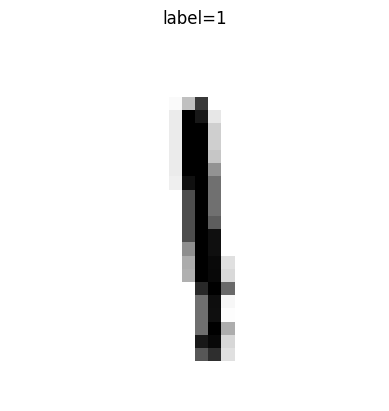

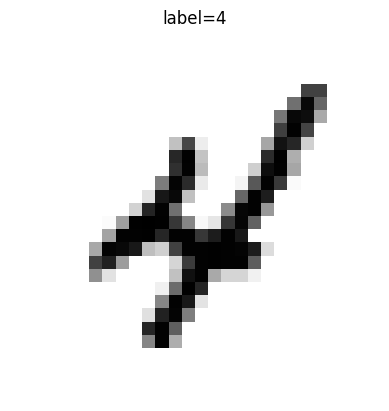

In [ ]:
for i in range(10):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(f"label={y_train[i]}")
    plt.axis("off")
    plt.show()

In [ ]:
x_train = x_train[..., np.newaxis].astype("float32") / 255.0
x_test  = x_test[...,  np.newaxis].astype("float32") / 255.0

In [ ]:
print("Training sample after normalizing (min,max):",
      float(x_train[0].min()), float(x_train[0].max()))
print("Testing sample after normalizing (min,max):",
      float(x_test[0].min()), float(x_test[0].max()))

Training sample after normalizing (min,max): 0.0 1.0
Testing sample after normalizing (min,max): 0.0 1.0


In [ ]:
model = keras.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 1st Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 2nd Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # 3rd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flattening Layer
    layers.Flatten(),

    # Fully Connected (Dense) Layer
    layers.Dense(64, activation='relu'),

    # Output Layer (10 classes, softmax for probability distribution)
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8847 - loss: 0.3714 - val_accuracy: 0.9821 - val_loss: 0.0593
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9839 - val_loss: 0.0574
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9878 - loss: 0.0394 - val_accuracy: 0.9873 - val_loss: 0.0509
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9902 - loss: 0.0287 - val_accuracy: 0.9887 - val_loss: 0.0492
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.0233 - val_accuracy: 0.9898 - val_loss: 0.0404
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9875 - val_loss: 0.0507
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9946 - loss: 0.0156 - val_accuracy: 0.9912 - val_loss: 0.0461
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9962 - loss: 0.0

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.041432514786720276
Test accuracy: 0.989300012588501


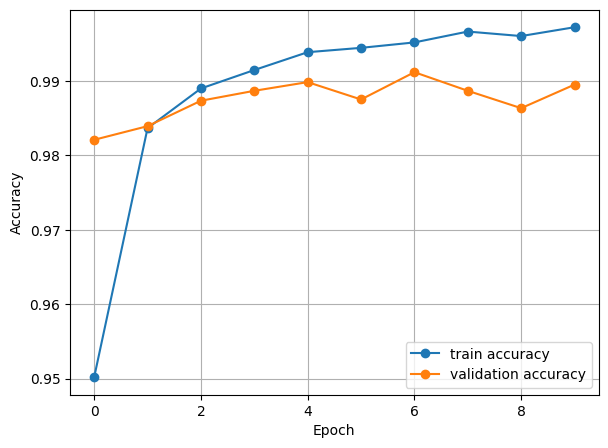

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

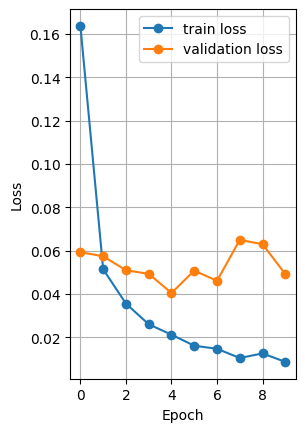

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model.save("cvpr_m.keras")